In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use("ggplot")

In [2]:
ProjData = pd.read_csv("../input/walmart-store-sales/Walmart_Store_sales.csv")

In [3]:
##Data Inspection
ProjData.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
ProjData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
ProjData.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [6]:
ProjData.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [7]:
ProjData.size

51480

In [8]:
ProjData.shape

(6435, 8)

In [9]:
#Converting Date Column in DateType
ProjData.Date = pd.to_datetime(ProjData.Date,dayfirst=True)
ProjData.Store = ProjData.Store.astype(str)
ProjData.Weekly_Sales = ProjData.Weekly_Sales.round(0).astype(int)
ProjData.Store = 'WM Store '+ ProjData.Store.astype(str)

In [10]:
ProjData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   object        
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   int64         
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 402.3+ KB


In [11]:
ProjData.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,WM Store 1,2010-02-05,1643691,0,42.31,2.572,211.096358,8.106
1,WM Store 1,2010-02-12,1641957,1,38.51,2.548,211.242170,8.106
2,WM Store 1,2010-02-19,1611968,0,39.93,2.514,211.289143,8.106
3,WM Store 1,2010-02-26,1409728,0,46.63,2.561,211.319643,8.106
4,WM Store 1,2010-03-05,1554807,0,46.50,2.625,211.350143,8.106


In [12]:
#Which store has maximum sales?
MaxSale = ProjData.groupby("Store")["Weekly_Sales"].sum().reset_index(name="Total_Sale").sort_values(by='Total_Sale', ascending=False)
MaxSale.head(5)
#the WM store 20 has the maximum sales value.

,Store,Total_Sale
12,WM Store 20,301397795
33,WM Store 4,299543953
5,WM Store 14,288999910
4,WM Store 13,286517707
11,WM Store 2,275382440


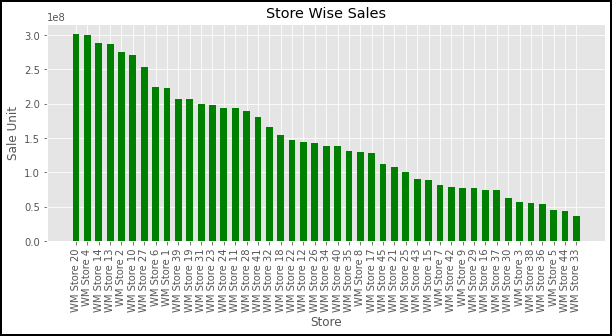

In [13]:
#Plotting Maximum Sale
plt.figure(figsize=(10,4),edgecolor='black',linewidth=4)
plt.bar(MaxSale['Store'], MaxSale['Total_Sale'], color='green', width=0.6)
plt.xlabel("Store")
plt.ylabel("Sale Unit")
plt.title("Store Wise Sales")
plt.xticks(rotation=90)
plt.show()

In [14]:
#Which store has maximum standard deviation? i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation
MaxStd = ProjData.groupby("Store")["Weekly_Sales"].std().reset_index(name="Standard Deviation").sort_values(by='Standard Deviation', ascending=False)
MaxStd['Standard Deviation']=MaxStd['Standard Deviation'].round(2)
MaxStd.head(5)

,Store,Standard Deviation
5,WM Store 14,317569.96
1,WM Store 10,302262.10
12,WM Store 20,275900.52
33,WM Store 4,266201.40
4,WM Store 13,265507.00


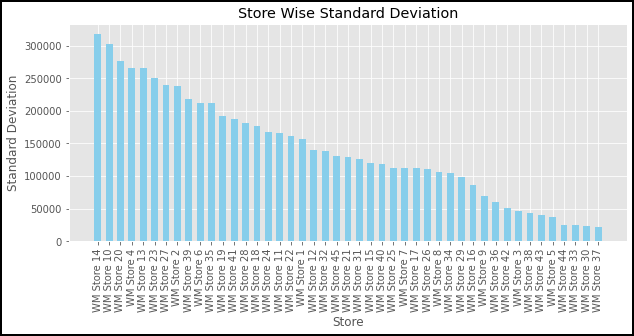

In [15]:
#Plotting Standard Deviation
plt.figure(figsize=(10,4),edgecolor='black',linewidth=4)
plt.bar(MaxStd['Store'], MaxStd['Standard Deviation'], color='skyblue', width=0.6)
plt.xlabel("Store")
plt.ylabel("Standard Deviation")
plt.title("Store Wise Standard Deviation")
plt.xticks(rotation=90)
plt.show()

In [16]:
#the coefficient of mean to standard deviation

MaxCoef = ProjData.groupby("Store")["Weekly_Sales"].sum().reset_index(name="Total_Sale").sort_values(by='Total_Sale', ascending=False)
CoefVar = lambda x: np.std(MaxCoef['Total_Sale'], ddof=1) / np.mean(MaxCoef['Total_Sale']) * 100
CoefVal = CoefVar(MaxCoef['Total_Sale'])

print("The Coefficient of Mean to Standard Deviation is", (round(CoefVal,2)))

The Coefficient of Mean to Standard Deviation is 52.21


In [17]:
#Which store/s has good quarterly growth rate in Q3’2012
import calendar
ProjData['year']= ProjData['Date'].dt.year
ProjData['month']= ProjData['Date'].dt.month
ProjData['day']= ProjData['Date'].dt.day
ProjData['MonthName']= ProjData['month'].apply(lambda x: calendar.month_name[x])
ProjData.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,MonthName
0,WM Store 1,2010-02-05,1643691,0,42.31,2.572,211.096358,8.106,2010,2,5,February
1,WM Store 1,2010-02-12,1641957,1,38.51,2.548,211.242170,8.106,2010,2,12,February
2,WM Store 1,2010-02-19,1611968,0,39.93,2.514,211.289143,8.106,2010,2,19,February
3,WM Store 1,2010-02-26,1409728,0,46.63,2.561,211.319643,8.106,2010,2,26,February
4,WM Store 1,2010-03-05,1554807,0,46.50,2.625,211.350143,8.106,2010,3,5,March


In [18]:
SaleData2012 = ProjData[ProjData['year']==2012]
SaleData2012.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,MonthName
100,WM Store 1,2012-01-06,1550370,0,49.01,3.157,219.714258,7.348,2012,1,6,January
101,WM Store 1,2012-01-13,1459601,0,48.53,3.261,219.892526,7.348,2012,1,13,January
102,WM Store 1,2012-01-20,1394394,0,54.11,3.268,219.985689,7.348,2012,1,20,January
103,WM Store 1,2012-01-27,1319326,0,54.26,3.290,220.078852,7.348,2012,1,27,January
104,WM Store 1,2012-02-03,1636340,0,56.55,3.360,220.172015,7.348,2012,2,3,February


In [19]:
def calqtr(x):
    if x['month']==1 or x['month']==2 or x['month']==3: return 1
    elif x['month']==4 or x['month']==5 or x['month']==6: return 2
    elif x['month']==7 or x['month']==8 or x['month']==9: return 3
    else: return 4

SaleData2012Qtr = SaleData2012.copy()
SaleData2012Qtr['Qtr'] = SaleData2012.apply(calqtr, axis=1)

SaleData2012Qtr.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,MonthName,Qtr
100,WM Store 1,2012-01-06,1550370,0,49.01,3.157,219.714258,7.348,2012,1,6,January,1
101,WM Store 1,2012-01-13,1459601,0,48.53,3.261,219.892526,7.348,2012,1,13,January,1
102,WM Store 1,2012-01-20,1394394,0,54.11,3.268,219.985689,7.348,2012,1,20,January,1
103,WM Store 1,2012-01-27,1319326,0,54.26,3.290,220.078852,7.348,2012,1,27,January,1
104,WM Store 1,2012-02-03,1636340,0,56.55,3.360,220.172015,7.348,2012,2,3,February,1


In [20]:
QtrSales = SaleData2012Qtr.groupby(["Store",'Qtr'])["Weekly_Sales"].sum().reset_index(name="Qtr_Sale").sort_values(by='Store')
QtrSales1 = pd.DataFrame(QtrSales)
QtrSales1.head()

,Store,Qtr,Qtr_Sale
0,WM Store 1,1,20723764
1,WM Store 1,2,20978761
2,WM Store 1,3,20253947
3,WM Store 1,4,6245588
4,WM Store 10,1,24488946


In [21]:
#Caculate Growth Rate.
SaleDataQ2 = QtrSales1[QtrSales1['Qtr'].isin([2, 3])].sort_values(by='Qtr_Sale',ascending=False)
GrowthRate = SaleDataQ2.pivot(index='Store', columns='Qtr', values='Qtr_Sale').reset_index()
GrowthRateF= pd.DataFrame(GrowthRate)
GrowthRateF['GrowthRate'] = ((GrowthRateF.iloc[:,2]-GrowthRateF.iloc[:,1])/GrowthRateF.iloc[:,1]*100).round(2)
GrowthRateF = GrowthRateF.sort_values(by='GrowthRate',ascending=False)
GrowthRateF.head()
#Store 7 is the best QOQ growth rate in Quarter 3

Qtr,Store,2,3,GrowthRate
42,WM Store 7,7290859,8262787,13.33
7,WM Store 16,6564336,7121544,8.49
28,WM Store 35,10838312,11322421,4.47
18,WM Store 26,13155335,13675693,3.96
32,WM Store 39,20214129,20715118,2.48


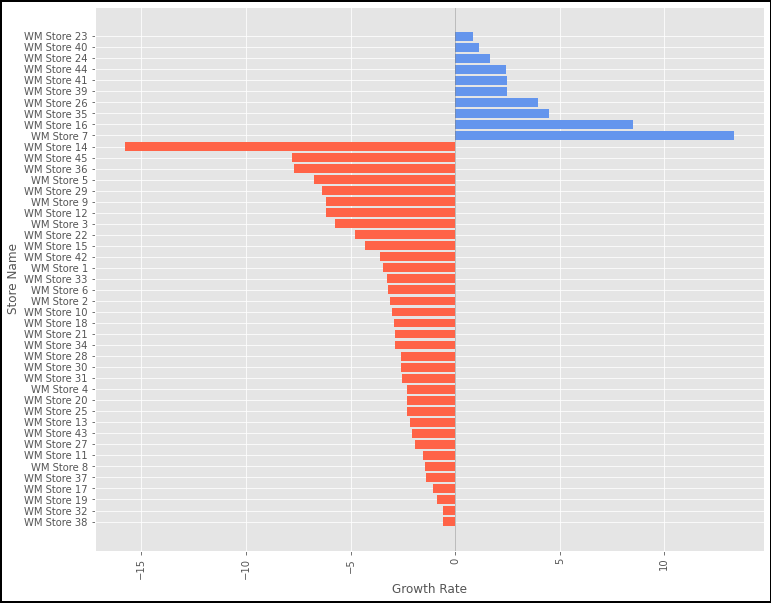

In [22]:
#Plotting 3rd Quarter Growth Rate.
plt.figure(figsize=(12,10),edgecolor='black',linewidth=4)
plt.barh(GrowthRateF['Store'][GrowthRateF['GrowthRate'] < 0], GrowthRateF['GrowthRate'][GrowthRateF['GrowthRate']  < 0], color='tomato')
plt.barh(GrowthRateF['Store'][GrowthRateF['GrowthRate'] > 0], GrowthRateF['GrowthRate'][GrowthRateF['GrowthRate'] > 0], color='cornflowerblue')
plt.xticks(rotation=90)
plt.xlabel("Growth Rate")
plt.ylabel("Store Name")
plt.axvline(0, color='grey', lw=0.5)
plt.show()


In [23]:
#Some holidays have a negative impact on sales. 
#Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together
HolidaySale = ProjData.copy()
HolidaySale = HolidaySale[HolidaySale['Holiday_Flag']==1]
HolidaySale.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,MonthName
1,WM Store 1,2010-02-12,1641957,1,38.51,2.548,211.242170,8.106,2010,2,12,February
31,WM Store 1,2010-09-10,1507461,1,78.69,2.565,211.495190,7.787,2010,9,10,September
42,WM Store 1,2010-11-26,1955624,1,64.52,2.735,211.748433,7.838,2010,11,26,November
47,WM Store 1,2010-12-31,1367320,1,48.43,2.943,211.404932,7.838,2010,12,31,December
53,WM Store 1,2011-02-11,1649615,1,36.39,3.022,212.936705,7.742,2011,2,11,February


In [24]:
#Creating Holiday Variable.
def holiday(x):
    if x['day'] in [8,10,11,12] and x['MonthName']=='February': return "Super Bowl Day"
    elif x['day'] in [6,7,9,10] and x['MonthName']=='September': return "Labour Day"
    elif x['day'] in [23,25,26,29] and x['MonthName']=='November': return "ThanksGiving Day"
    elif x['day'] in [27,28,30,31] and x['MonthName']=='December': return "Christmas Day"
    else: return None
    
HolidaySale['HolidayName'] = HolidaySale.apply(holiday, axis=1)
HolidaySale.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,MonthName,HolidayName
1,WM Store 1,2010-02-12,1641957,1,38.51,2.548,211.242170,8.106,2010,2,12,February,Super Bowl Day
31,WM Store 1,2010-09-10,1507461,1,78.69,2.565,211.495190,7.787,2010,9,10,September,Labour Day
42,WM Store 1,2010-11-26,1955624,1,64.52,2.735,211.748433,7.838,2010,11,26,November,ThanksGiving Day
47,WM Store 1,2010-12-31,1367320,1,48.43,2.943,211.404932,7.838,2010,12,31,December,Christmas Day
53,WM Store 1,2011-02-11,1649615,1,36.39,3.022,212.936705,7.742,2011,2,11,February,Super Bowl Day


In [25]:
NonHolidaySale = ProjData.copy()
NonHolidaySale = NonHolidaySale[NonHolidaySale['Holiday_Flag']==0]
NonHolidaySale.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,MonthName
0,WM Store 1,2010-02-05,1643691,0,42.31,2.572,211.096358,8.106,2010,2,5,February
2,WM Store 1,2010-02-19,1611968,0,39.93,2.514,211.289143,8.106,2010,2,19,February
3,WM Store 1,2010-02-26,1409728,0,46.63,2.561,211.319643,8.106,2010,2,26,February
4,WM Store 1,2010-03-05,1554807,0,46.50,2.625,211.350143,8.106,2010,3,5,March
5,WM Store 1,2010-03-12,1439542,0,57.79,2.667,211.380643,8.106,2010,3,12,March


In [26]:
#Non holiday session mean value.
NonHolidayMean = NonHolidaySale.groupby("Store")["Weekly_Sales"].mean().reset_index(name="Average Sale").sort_values(by='Average Sale', ascending=False)
NonHolidayMean['Average Sale']=NonHolidayMean['Average Sale'].round(2)
NonHolidayMean = pd.DataFrame(NonHolidayMean)
NonHolidayMean = NonHolidayMean.reset_index(drop=True)
NonHolidayMean.head()

,Store,Average Sale
0,WM Store 20,2097048.45
1,WM Store 4,2083555.84
2,WM Store 14,2013489.32
3,WM Store 13,1995393.00
4,WM Store 2,1914208.79


In [27]:
#Mapping non holiday Mean value in holiday sales data.
meandict = NonHolidayMean.set_index('Store')['Average Sale'].to_dict()
HolidaySale['NonHolidayAvgSale'] = HolidaySale['Store'].map(meandict)
HolidaySale.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,MonthName,HolidayName,NonHolidayAvgSale
1,WM Store 1,2010-02-12,1641957,1,38.51,2.548,211.242170,8.106,2010,2,12,February,Super Bowl Day,1546957.42
31,WM Store 1,2010-09-10,1507461,1,78.69,2.565,211.495190,7.787,2010,9,10,September,Labour Day,1546957.42
42,WM Store 1,2010-11-26,1955624,1,64.52,2.735,211.748433,7.838,2010,11,26,November,ThanksGiving Day,1546957.42
47,WM Store 1,2010-12-31,1367320,1,48.43,2.943,211.404932,7.838,2010,12,31,December,Christmas Day,1546957.42
53,WM Store 1,2011-02-11,1649615,1,36.39,3.022,212.936705,7.742,2011,2,11,February,Super Bowl Day,1546957.42


In [28]:
#Fetching holiday which has high sales than non holiday session.
HighSale = HolidaySale.query('Weekly_Sales > NonHolidayAvgSale')
HighSale.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,MonthName,HolidayName,NonHolidayAvgSale
1,WM Store 1,2010-02-12,1641957,1,38.51,2.548,211.242170,8.106,2010,2,12,February,Super Bowl Day,1546957.42
42,WM Store 1,2010-11-26,1955624,1,64.52,2.735,211.748433,7.838,2010,11,26,November,ThanksGiving Day,1546957.42
53,WM Store 1,2011-02-11,1649615,1,36.39,3.022,212.936705,7.742,2011,2,11,February,Super Bowl Day,1546957.42
94,WM Store 1,2011-11-25,2033321,1,60.14,3.236,218.467621,7.866,2011,11,25,November,ThanksGiving Day,1546957.42
105,WM Store 1,2012-02-10,1802477,1,48.02,3.409,220.265178,7.348,2012,2,10,February,Super Bowl Day,1546957.42


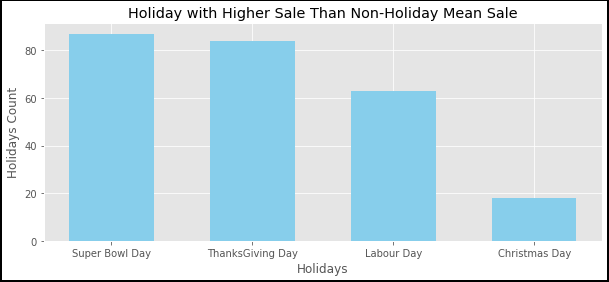

In [29]:
holiday = HighSale['HolidayName'].value_counts()
holiday = pd.DataFrame(holiday).reset_index()
plt.figure(figsize=(10,4),edgecolor='black',linewidth=4)
plt.bar(holiday['index'], holiday['HolidayName'], color='skyblue', width=0.6)
plt.xlabel("Holidays")
plt.ylabel("Holidays Count")
plt.title("Holiday with Higher Sale Than Non-Holiday Mean Sale")
plt.show()

In [30]:
#Provide a monthly and semester view of sales in units and give insights
#Monthly Sale of all store
MonthlySale = ProjData.groupby("MonthName")["Weekly_Sales"].sum().reset_index(name="Total_Sale").sort_values(by='Total_Sale', ascending=False)
MonthlySale['Total_Sale']=MonthlySale['Total_Sale'].round(2)
MonthlySale.head()

,MonthName,Total_Sale
5,July,650000979
0,April,646859782
6,June,622629884
1,August,613090208
7,March,592785886


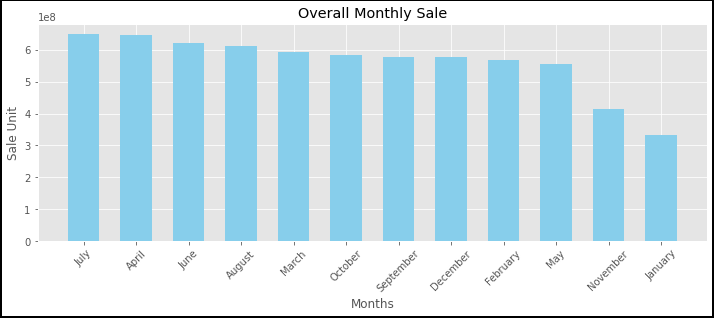

In [31]:
#Plotting Monthly Sale of all years
style.use("ggplot")
plt.figure(figsize=(12,4),edgecolor='black',linewidth=4)
plt.bar(MonthlySale['MonthName'], MonthlySale['Total_Sale'], color='skyblue', width=0.6)
plt.xlabel("Months")
plt.ylabel("Sale Unit")
plt.title("Overall Monthly Sale")
plt.xticks(rotation=45)
plt.show()

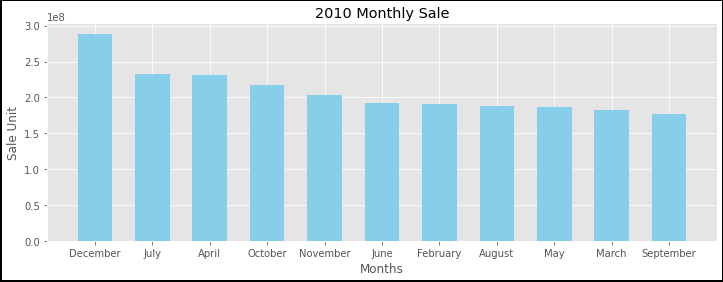

In [32]:
#Year Wise Monthly Sale = 2010
Sale2010 = ProjData[ProjData['year']==2010].groupby("MonthName")["Weekly_Sales"].sum().reset_index(name="Total_Sale").sort_values(by='Total_Sale', ascending=False)
Sale2010['Total_Sale']=Sale2010['Total_Sale'].round(2)
plt.figure(figsize=(12,4),edgecolor='black',linewidth=4)
plt.bar(Sale2010['MonthName'], Sale2010['Total_Sale'], color='skyblue', width=0.6)
plt.xlabel("Months")
plt.ylabel("Sale Unit")
plt.title("2010 Monthly Sale")
plt.show()

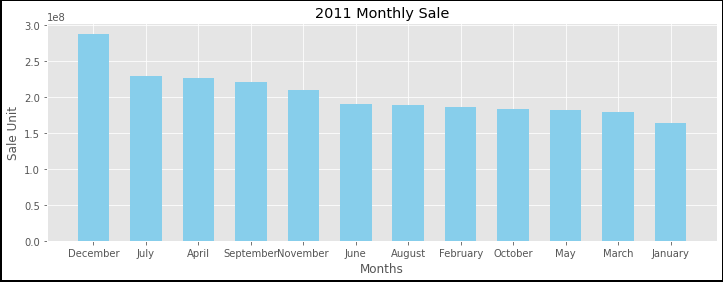

In [33]:
#Year Wise Monthly Sale= 2011
Sale2011 = ProjData[ProjData['year']==2011].groupby("MonthName")["Weekly_Sales"].sum().reset_index(name="Total_Sale").sort_values(by='Total_Sale', ascending=False)
Sale2011['Total_Sale']=Sale2011['Total_Sale'].round(2)
plt.figure(figsize=(12,4),edgecolor='black',linewidth=4)
plt.bar(Sale2011['MonthName'], Sale2011['Total_Sale'], color='skyblue', width=0.6)
plt.xlabel("Months")
plt.ylabel("Sale Unit")
plt.title("2011 Monthly Sale")
plt.show()

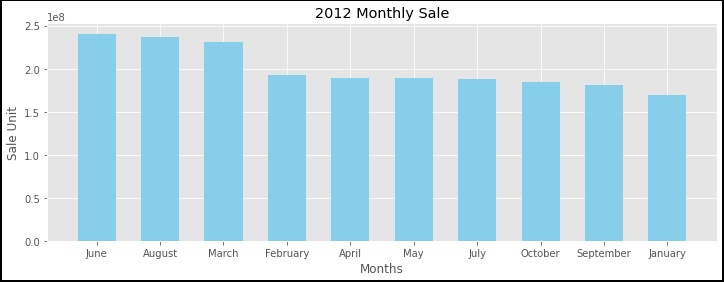

In [34]:
#Year Wise Monthly Sale = 2012
Sale2012 = ProjData[ProjData['year']==2012].groupby("MonthName")["Weekly_Sales"].sum().reset_index(name="Total_Sale").sort_values(by='Total_Sale', ascending=False)
Sale2012['Total_Sale']=Sale2012['Total_Sale'].round(2)
plt.figure(figsize=(12,4),edgecolor='black',linewidth=4)
plt.bar(Sale2012['MonthName'], Sale2012['Total_Sale'], color='skyblue', width=0.6)
plt.xlabel("Months")
plt.ylabel("Sale Unit")
plt.title("2012 Monthly Sale")
plt.show()

In [35]:
#Plotting yearly Sale
YearlySale = ProjData.groupby("year")["Weekly_Sales"].sum().reset_index(name="Total_Sale").sort_values(by='Total_Sale', ascending=False)
YearlySale['Total_Sale']=YearlySale['Total_Sale'].round(2)
YearlySale['year']=YearlySale['year'].astype(str)
YearlySale.head()

,year,Total_Sale
1,2011,2448200008
0,2010,2288886120
2,2012,2000132851


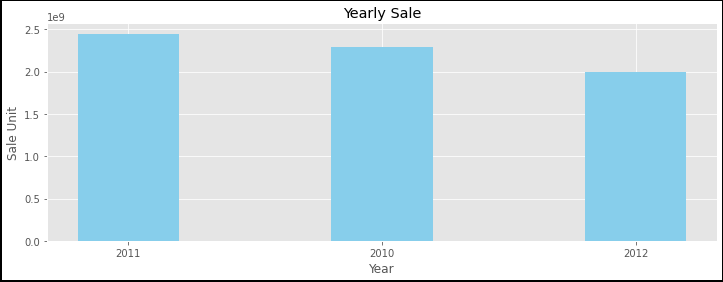

In [36]:
#Plotting Year Sale
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use("ggplot")
plt.figure(figsize=(12,4),edgecolor='black',linewidth=4)
plt.bar(YearlySale['year'], YearlySale['Total_Sale'], color='skyblue', width=0.4)
plt.xlabel("Year")
plt.ylabel("Sale Unit")
plt.title("Yearly Sale")
plt.show()

In [37]:
##Statistical Task
##For Store 1 – Build  prediction models to forecast demand
from sklearn.preprocessing import LabelEncoder
LabEncoder = LabelEncoder()
Store1Data = ProjData[ProjData['Store']=='WM Store 1']
Store1Data = Store1Data.copy()
Store1Data['Date_New'] = LabEncoder.fit_transform(Store1Data['Date'])
Store1Data.drop(['Store','Date','Holiday_Flag','year','month','day','MonthName'],axis=1 , inplace = True)
Store1Data.head()

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Date_New
0,1643691,42.31,2.572,211.096358,8.106,0
1,1641957,38.51,2.548,211.242170,8.106,1
2,1611968,39.93,2.514,211.289143,8.106,2
3,1409728,46.63,2.561,211.319643,8.106,3
4,1554807,46.50,2.625,211.350143,8.106,4


In [38]:
#Correlation matrix of Variables.
corrmatrix = Store1Data.corr()
print("Correlation matrix is : ")
print(corrmatrix)

Correlation matrix is : 
              Weekly_Sales  Temperature  Fuel_Price       CPI  Unemployment  \
Weekly_Sales      1.000000    -0.222701    0.124592  0.225408     -0.097955   
Temperature      -0.222701     1.000000    0.228493  0.118503     -0.180695   
Fuel_Price        0.124592     0.228493    1.000000  0.755259     -0.513944   
CPI               0.225408     0.118503    0.755259  1.000000     -0.813471   
Unemployment     -0.097955    -0.180695   -0.513944 -0.813471      1.000000   
Date_New          0.214539     0.154069    0.781789  0.973943     -0.791222   

              Date_New  
Weekly_Sales  0.214539  
Temperature   0.154069  
Fuel_Price    0.781789  
CPI           0.973943  
Unemployment -0.791222  
Date_New      1.000000  


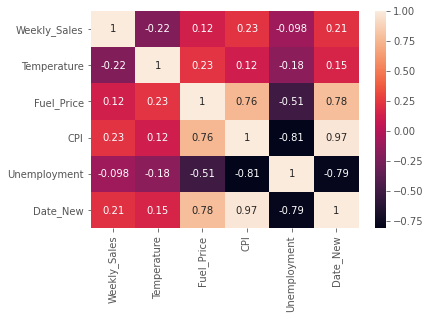

In [39]:
#Heatmap of Variables
ax = sns.heatmap(Store1Data.corr(), annot=True)

In [40]:
#Looking heatmap and correlation table, Date,CPI,FuelPrice have correlation to Weekly Sales but all of these have multi colinearity, so we will build the model on Date Variable.

LRModelData = Store1Data[['Weekly_Sales','Date_New']]
LRModelData.shape

(143, 2)

In [41]:
# Creating train Test Data.
from sklearn.model_selection import train_test_split
T = LRModelData.drop("Weekly_Sales", axis=1)
X = np.array(T).reshape((-1, 1))
y = LRModelData["Weekly_Sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 21) 

In [42]:
print("Shape of X_train is " , X_train.shape)
print("Shape of y_train is " , y_train.shape)
print("=====================================")
print("Shape of X_test is " , X_test.shape)
print("Shape of y_test is " , y_test.shape)

Shape of X_train is  (114, 1)
Shape of y_train is  (114,)
Shape of X_test is  (29, 1)
Shape of y_test is  (29,)


In [43]:
from sklearn.linear_model import LinearRegression
LRModel = LinearRegression()
LRModel.fit(X_train,y_train)

LinearRegression()

In [44]:
#Prediction
ypred = LRModel.predict(X_test)
ypred = ypred.round(2)

In [45]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print("The RMSE value of the LR model on the test data is: ",np.sqrt(mean_squared_error(y_test , ypred)))
print("The MAE value of the LR model on the test data is: ", mean_absolute_error(y_test, ypred))

The RMSE value of the LR model on the test data is:  152074.97115154992
The MAE value of the LR model on the test data is:  108321.98689655172


In [46]:
ActPred = pd.DataFrame({"Actual Sales" : y_test, "Predicted Sales": ypred})
ActPred.head()

,Actual Sales,Predicted Sales
97,1881177,1574923.48
107,1539388,1583034.94
7,1404430,1501920.29
92,1594939,1570867.75
26,1605492,1517332.07


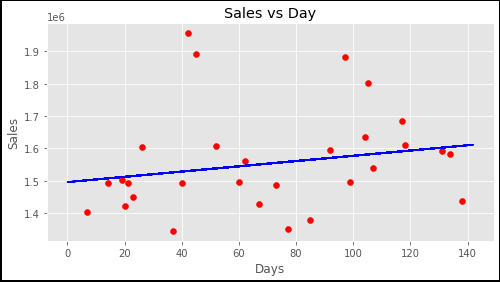

In [47]:
# Plotting the value.
plt.figure(figsize=(8,4),edgecolor='black',linewidth=4)
plt.scatter(X_test, y_test, color='red') 
plt.plot(X_train, LRModel.predict(X_train), color='blue') # plotting the regression line
plt.title("Sales vs Day")
plt.xlabel("Days") 
plt.ylabel("Sales") 
plt.show() 